Kacper Staroń
298842

## PD5 Klasteryzacja

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

### Przygotowanie środowiska

In [104]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

### Wczytanie i przegląd danych

In [9]:
data = pd.read_csv('../../clustering.csv', header = None)
data.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [11]:
data.columns = ('x', 'y')
data.describe()

,x,y
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


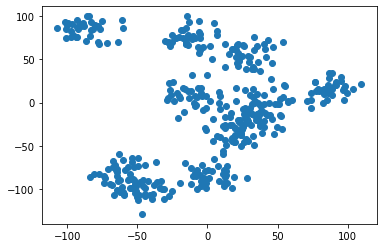

In [13]:
plt.scatter(data['x'], data['y'])

## 1. Algorytm K-Means

### Funkcje pomocnicze do liczenia miar jakości klasteryzacji:

In [109]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

In [91]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

## Szukanie najlepszego podziału

Sprawdzamy sumę kwadratów odległości wewnątrz wyznaczonych klastrów dla różnych ilości klastrów i szukamy "na oko" punktu przegięcia (tzw. metoda łokcia). Na poniższym wykresie dostrzegamy, że szukany punkt znajduje się mniej więcej między 7 a 10 klastrami.

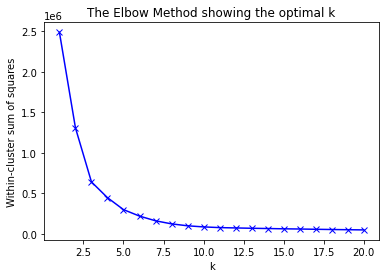

In [85]:
wcss_vec = count_wcss_scores(data, 20)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Spostrzeżenia z pierwszego wykresu potwierdzamy analogicznym badaniem miary $silhouette$. Teraz szukamy liczby klastrów, dla której badany współczynnik jest największy. Ponownie wykres wskazuje na wartości z przedziału (7, 10), a dokładnie wartość 8.

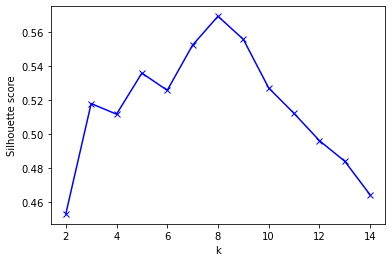

In [94]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(data, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Wizualizacje podziałów na odpowiednio 7, 8 i 9 klastrów. Wartość argumentu n_init wywowałania funkcji zwiększona dla uzyskania lepszych podziałów.

Intuicyjnie patrząc na wykresy także stwierdzamy, że podział na 8 klastrów jest najlepszy. Nie ma w tym nic dziwnego, jako że ludzki mózg najczęściej przy analizowaniu obrazu na płaszczyźnie "na logikę" dokonuje operacji bardzo podobnych do obliczania miary WCSS.

Text(0.5, 1.0, 'k = 7')

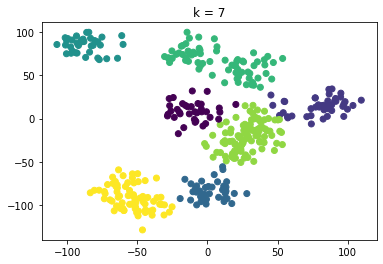

In [111]:
kmeans = KMeans(n_clusters=7, n_init=400, random_state=0)
kmeans.fit(data)
y = kmeans.predict(data)
plt.scatter(data['x'], data['y'], c = y)
plt.title('k = 7')

Text(0.5, 1.0, 'k = 8')

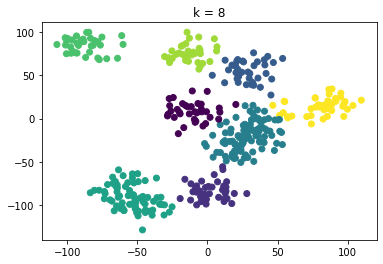

In [112]:
kmeans = KMeans(n_clusters=8, n_init=400, random_state=0)
kmeans.fit(data)
y = kmeans.predict(data)
plt.scatter(data['x'], data['y'], c = y)
plt.title('k = 8')

Text(0.5, 1.0, 'k = 9')

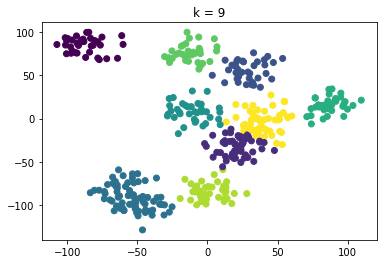

In [113]:
kmeans = KMeans(n_clusters=9, n_init=400, random_state=0)
kmeans.fit(data)
y = kmeans.predict(data)
plt.scatter(data['x'], data['y'], c = y)
plt.title('k = 9')

## Algorytm aglomeracyjny

Drugim analizowanym algorytmem jest klasteryzacja aglomeracyjna. Także w tym przypadku miara $silhouette$ wskazuje na liczbę 8 klastrów.

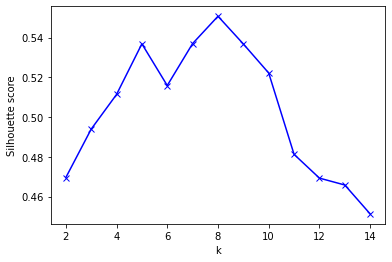

In [108]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(data, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

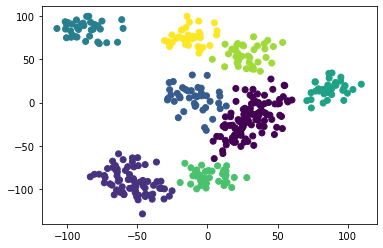

In [118]:
algorithms['agglom'] = AgglomerativeClustering(n_clusters=8, linkage="ward")
y = algorithms['agglom'].fit_predict(data)
plt.scatter(data['x'], data['y'], c = y)

Na koniec ogląd hierarchii klastrów zbudowanej przez model:

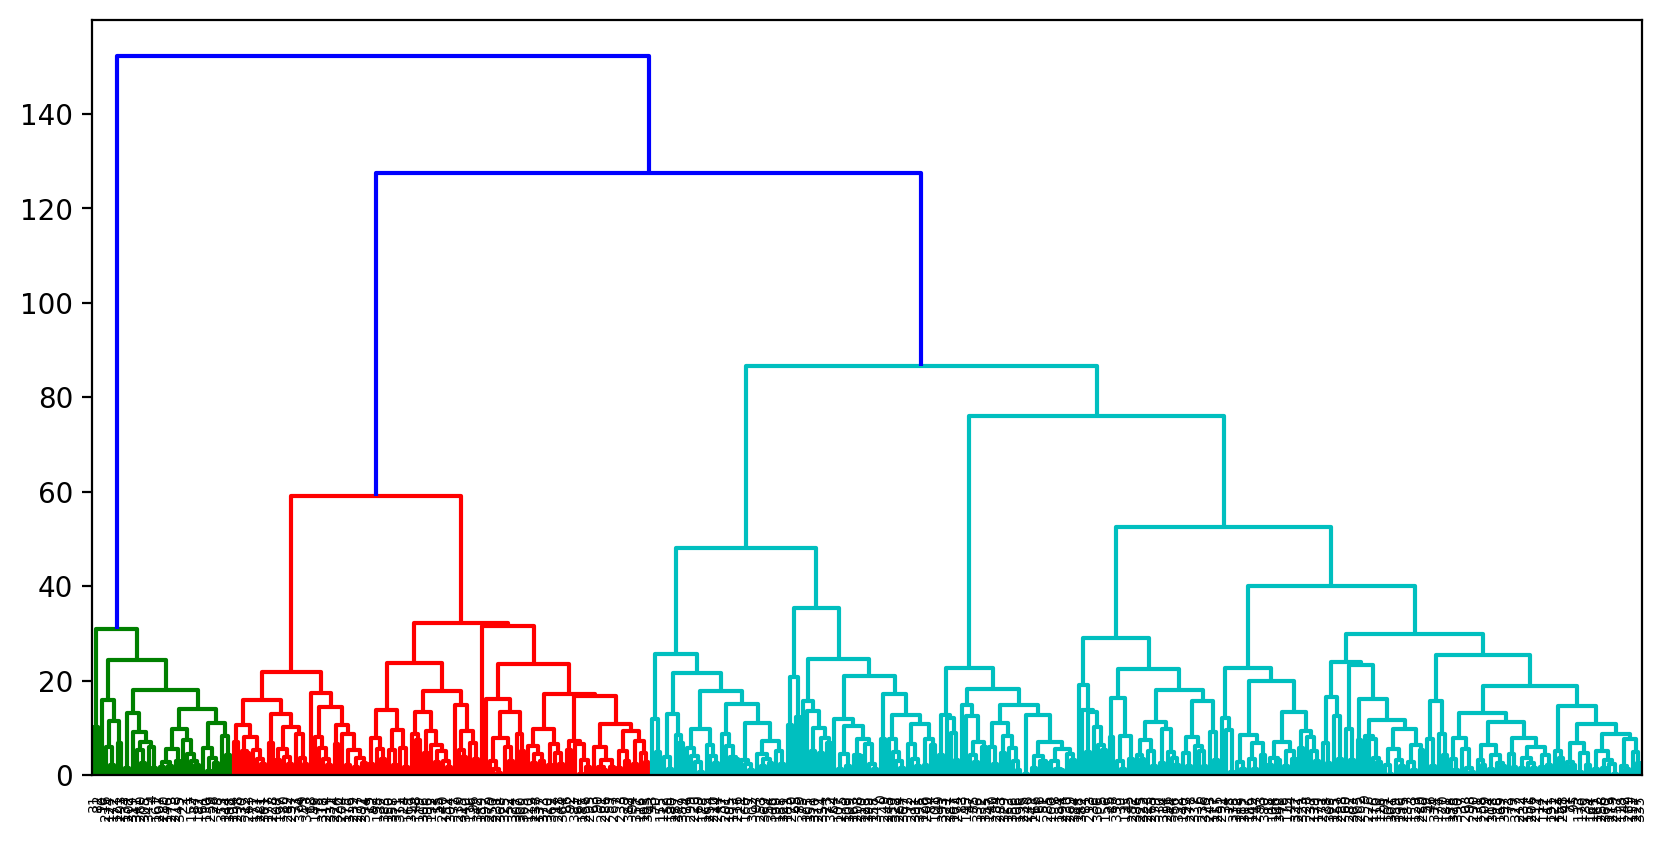

In [119]:
Z = hierarchy.linkage(data, method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.show()